<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Day23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Function(Mathematical) Trasformation**
Function transformation refers to the process of modifying the input features or target variables using a mathematical function to make the data more suitable for modeling. It’s a key step in feature engineering and preprocessing.
# **Why Use Function Transformations?**
✅ To reduce skewness \
✅ To normalize distributions \
✅ To stabilize variance \
✅ To improve model accuracy \
✅ To meet algorithm assumptions (like linearity, normality)

# **How to find if data is normal?**
  * use sns.displot()
  * use pd.skew()
  * use QQ plot

# **QQ plot**
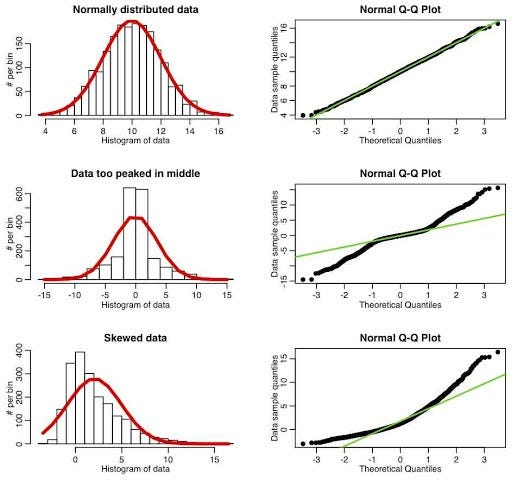

# **log transform**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.Series([1,10,100,1000,10000])

In [ ]:
log_data=np.log(data)
#we can use log1p(data) if the input contains 0

In [ ]:
print(data)
print('\n')
print(log_data)

0        1
1       10
2      100
3     1000
4    10000
dtype: int64


0    0.000000
1    2.302585
2    4.605170
3    6.907755
4    9.210340
dtype: float64


# **Reciprocal transform**

In [ ]:
recp_data= np.reciprocal(data,dtype=float)
print(data,recp_data)

0        1
1       10
2      100
3     1000
4    10000
dtype: int64 0    1.0000
1    0.1000
2    0.0100
3    0.0010
4    0.0001
dtype: float64


# **Square and Square root Transform**

In [ ]:
sq_data=np.square(data)
sq_root_data=np.sqrt(data)
print('Original data \n ',data)
print('Square data\n',sq_data)
print('Square root data\n',sq_root_data)

Original data 
  0        1
1       10
2      100
3     1000
4    10000
dtype: int64
Square data
 0            1
1          100
2        10000
3      1000000
4    100000000
dtype: int64
Square root data
 0      1.000000
1      3.162278
2     10.000000
3     31.622777
4    100.000000
dtype: float64


#Using ***Titanic data set*** to see the advantage of Functional Transform

In [ ]:
import scipy.stats as stats #for QQ plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('train (3).csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age'].isnull().sum()

np.int64(177)

In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True) #for putting mean values in places of nan value

<ipython-input-39-847f51a16761>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True) #for putting mean values in places of nan value


In [ ]:
df['Age'].isnull().sum()

np.int64(0)

In [77]:
#now selecting age and fare as x and
# survived as y
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [ ]:
x

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

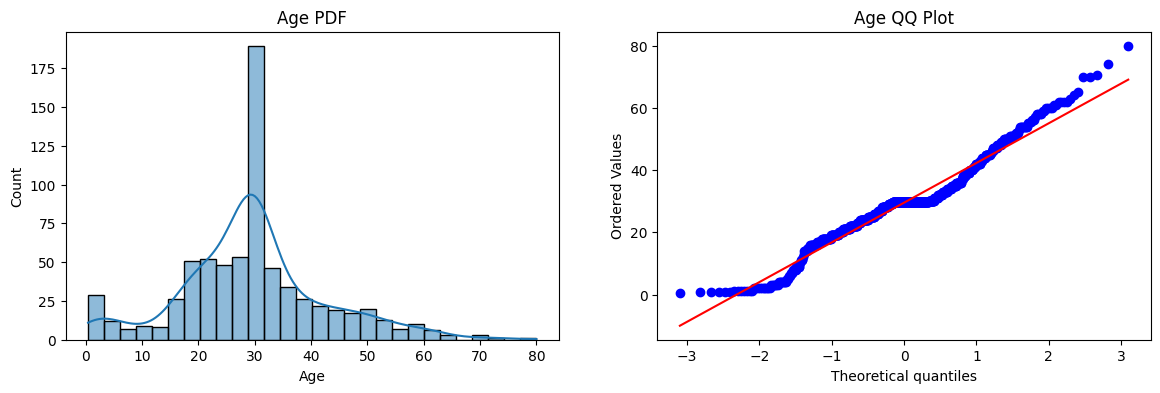

In [51]:
plt.figure(figsize=(14,4)) #width 14inch, height 4inch
plt.subplot(121) #one row, two column, index 1
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')
plt.subplot(122) #one row, two column, index 2
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

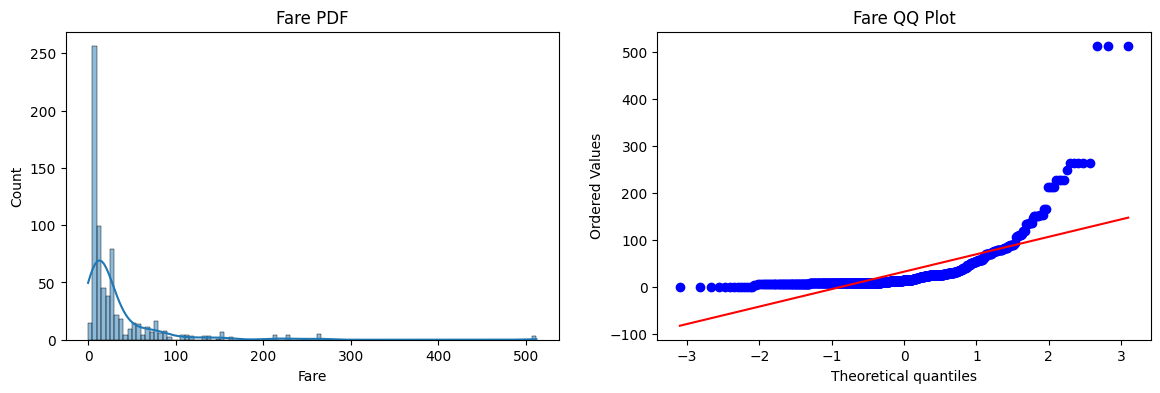

In [52]:
plt.figure(figsize=(14,4)) #width 14inch, height 4inch
plt.subplot(121) #one row, two column, index 1
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')
plt.subplot(122) #one row, two column, index 2
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [53]:
#use log transform for right skewed

# **Without using Functional Transformation**

In [59]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [60]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print('Accuracy LogisticRegression',accuracy_score(y_test,y_pred))
print('Accuracy DecisionTree',accuracy_score(y_test,y_pred2))

Accuracy LogisticRegression 0.6480446927374302
Accuracy DecisionTree 0.6536312849162011


# **Using Function Transformer**

In [62]:
trf=FunctionTransformer(func=np.log1p) #log1p= log(1+x)

In [64]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test) #here transform is used instead of fit transform because it is a test dataset

In [65]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [68]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy of Logestic Regression",accuracy_score(y_pred,y_test))
print("Accuracy of Decision Tree",accuracy_score(y_pred2,y_test))

Accuracy of Logestic Regression 0.6815642458100558
Accuracy of Decision Tree 0.6759776536312849


In [71]:
#here we can see that the accuracy of logistic regression is improved
#DecisionTree is not affected by the distribution of data

Custom transform function

In [79]:
def apply_transform(transform):
  x= df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
  X_trans=trf.fit_transform(x)
  clf=LogisticRegression()
  print('Accuracy',np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(x['Fare'],dist='norm',plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist='norm',plot=plt)
  plt.title('Fare After Transform')
  plt.show()


Accuracy 0.6589013732833957


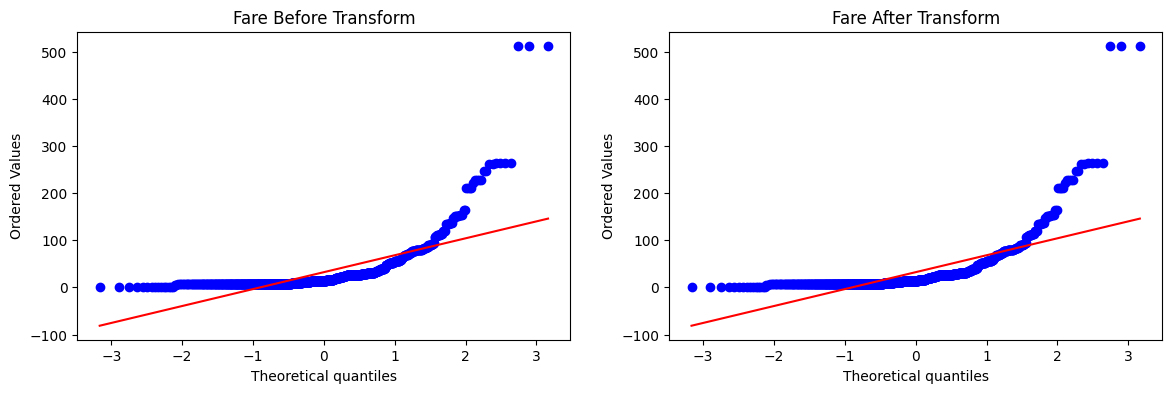

In [80]:
apply_transform(lambda x: x)

Accuracy 0.6431335830212235


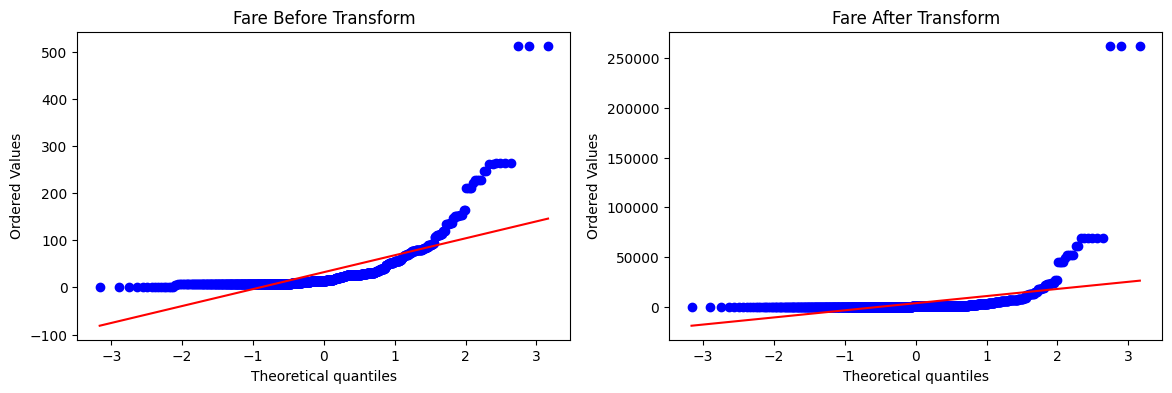

In [81]:
apply_transform(lambda x:x**2)

Accuracy 0.6611485642946316


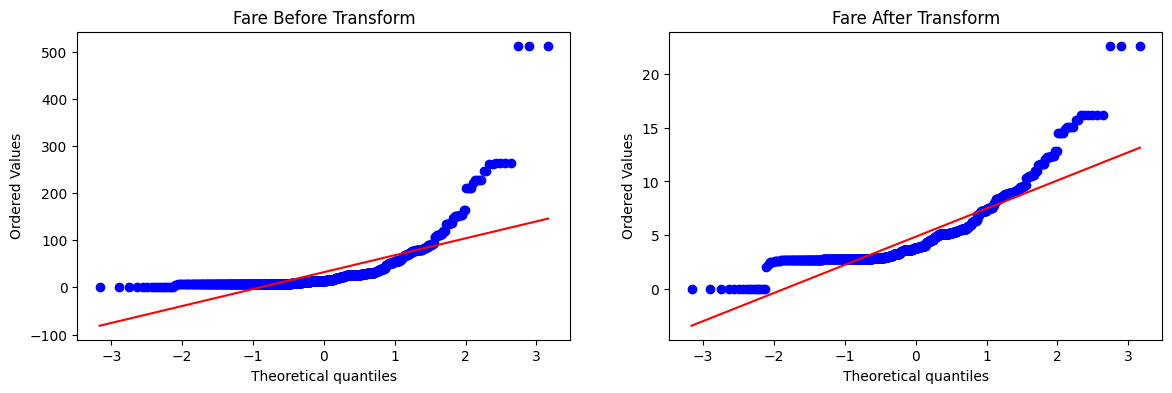

In [82]:
apply_transform(lambda x:np.sqrt(x))

Accuracy 0.6712609238451936


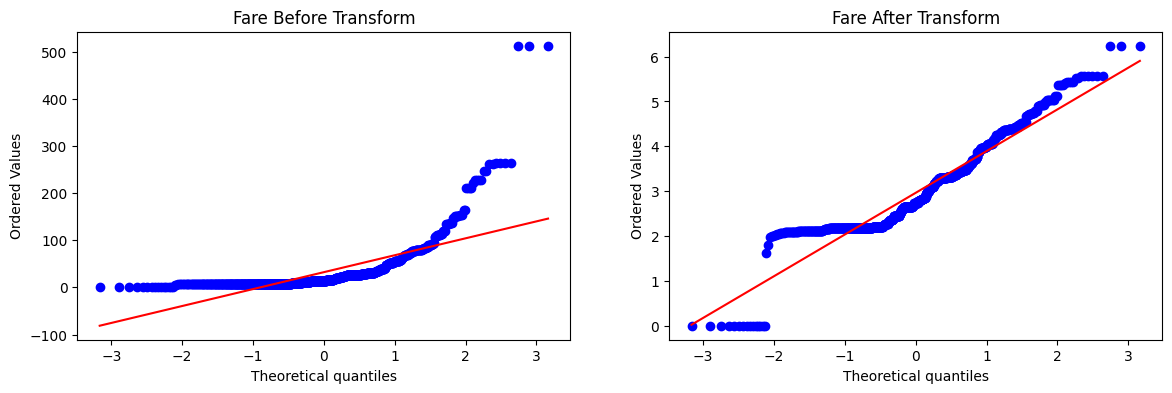

In [84]:
apply_transform(lambda x:np.log1p(x))